In [3]:

# get processed data

import os
import pandas as pd

file_path = "../data/"

data = pd.read_csv(file_path+"train.csv")


# Convert to list

df=data["news_title"]

docs = [str(i) for i in df.values]



import torch
from transformers import BertModel, BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("setu4993/LaBSE")
model = BertModel.from_pretrained("setu4993/LaBSE")

# Set model to evaluation mode

model.eval()


"""
Encode a batch of documents using LaBSE model and return their embeddings.
Args:
    docs: List of strings representing the documents to be encoded.
    batch_size: Size of the batch to be used during encoding.
Returns:
    embeddings: Tensor of shape (n_docs, embedding_size) representing the document embeddings.
"""
# Encode the documents in batches

n_docs = len(docs)
batch_size = 8
embeds = torch.zeros((n_docs, model.config.hidden_size))
for i in range(0, n_docs, batch_size):
    batch = docs[i:i+batch_size]
    inputs = tokenizer(batch, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    batch_embeddings = outputs.pooler_output
    embeds[i:i+batch_size] = batch_embeddings



# Tokenize docs trivially (split on spaces)

from indicnlp.tokenize import sentence_tokenize, indic_tokenize

def tokenize_ta(text,return_tensors="pt",*args,**kwargs):
    return indic_tokenize.trivial_tokenize(text)


# Common list of stopwords

stopwords=['அங்கு',
 'அங்கே',
 'அடுத்த',
 'அதனால்',
 'அதன்',
 'அதற்கு',
 'அதிக',
 'அதில்',
 'அது',
 'அதே',
 'அதை',
 'அந்த',
 'அந்தக்',
 'அந்தப்',
 'அன்று',
 'அல்லது',
 'அவன்',
 'அவரது',
 'அவர்',
 'அவர்கள்',
 'அவள்',
 'அவை',
 'ஆகிய',
 'ஆகியோர்',
 'ஆகும்',
 'இங்கு',
 'இங்கே',
 'இடத்தில்',
 'இடம்',
 'இதனால்',
 'இதனை',
 'இதன்',
 'இதற்கு',
 'இதில்',
 'இது',
 'இதை',
 'இந்த',
 'இந்தக்',
 'இந்தத்',
 'இந்தப்',
 'இன்னும்',
 'இப்போது',
 'இரு',
 'இருக்கும்',
 'இருந்த',
 'இருந்தது',
 'இருந்து',
 'இவர்',
 'இவை',
 'உன்',
 'உள்ள',
 'உள்ளது',
 'உள்ளன',
 'எந்த',
 'என',
 'எனக்',
 'எனக்கு',
 'எனப்படும்',
 'எனவும்',
 'எனவே',
 'எனினும்',
 'எனும்',
 'என்',
 'என்ன',
 'என்னும்',
 'என்பது',
 'என்பதை',
 'என்ற',
 'என்று',
 'என்றும்',
 'எல்லாம்',
 'ஏன்',
 'ஒரு',
 'ஒரே',
 'ஓர்',
 'கொண்ட',
 'கொண்டு',
 'கொள்ள',
 'சற்று',
 'சிறு',
 'சில',
 'சேர்ந்த',
 'தனது',
 'தன்',
 'தவிர',
 'தான்',
 'நான்',
 'நாம்',
 'நீ',
 'பற்றி',
 'பற்றிய',
 'பல',
 'பலரும்',
 'பல்வேறு',
 'பின்',
 'பின்னர்',
 'பிற',
 'பிறகு',
 'பெரும்',
 'பேர்',
 'போது',
 'போன்ற',
 'போல',
 'போல்',
 'மட்டுமே',
 'மட்டும்',
 'மற்ற',
 'மற்றும்',
 'மிக',
 'மிகவும்',
 'மீது',
 'முதல்',
 'முறை',
 'மேலும்',
 'மேல்',
 'யார்',
 'வந்த',
 'வந்து',
 'வரும்',
 'வரை',
 'வரையில்',
 'விட',
 'விட்டு',
 'வேண்டும்',
 'வேறு']

from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer object to generate term document counts for topic representation - TOKENIZATION STEP

vectorizer_model = CountVectorizer(
    stop_words=stopwords,analyzer='word',
    tokenizer=tokenize_ta
)


# Create a BERTopic model

from bertopic import BERTopic

topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    verbose=True,
    calculate_probabilities=False,
    embedding_model=model,
    
)

# Fit the model on the documents

embeds_np = embeds.detach().numpy()

topics = topic_model.fit_transform(docs,embeds_np)


/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


2023-04-23 18:26:20,043 - BERTopic - Reduced dimensionality
2023-04-23 18:26:20,274 - BERTopic - Clustered reduced embeddings


In [4]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,4195,-1_கொலை_போலீஸ்_பெண்_வழக்கு
1,0,223,0_கோடி_லட்சம்_ஆயிரம்_பறிமுதல்
2,1,217,1_இந்தியா_இங்கிலாந்து_வெஸ்ட்_இலங்கை
3,2,215,2_கோயில்_கோயிலில்_பக்தர்கள்_திருப்பதி
4,3,149,3_திமுக_அதிமுக_முகஸ்டாலின்_கூட்டணி
...,...,...,...
165,164,10,164_எஸ்எம்எஸ்_மூலம்_அனுப்பலாம்_நினைவூட்டல்
166,165,10,165_ஜேபிசி_நாடாளுமன்றம்_தீர்மானம்_பிஏசி
167,166,10,166_இந்தியாவுக்கு_நெருக்கடி_துபாயின்_இந்தியாவு...
168,167,10,167_திருவாரூர்_திருவாரூரில்_எம்எல்ஏவாக_கருணாநிதி


In [33]:
new_topics = topic_model.reduce_outliers(
    docs, topic_model.topics_, strategy="c-tf-idf")
topic_model.update_topics(
    docs, topics=new_topics, vectorizer_model=vectorizer_model)


In [35]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,69,-1_டிரென்ட்_சம்திங்_ஸ்டேட்_வித்தியாச
1,0,252,0_கோடி_ஆயிரம்_லட்சம்_பறிமுதல்
2,1,271,1_இந்தியா_இங்கிலாந்து_வெஸ்ட்_டெஸ்ட்
3,2,228,2_கோயில்_கோயிலில்_பக்தர்கள்_திருப்பதி
4,3,196,3_திமுக_அதிமுக_முகஸ்டாலின்_கூட்டணி
...,...,...,...
165,164,24,164_எஸ்எம்எஸ்_மூலம்_டம்_இமெயிலில்
166,165,40,165_பிஏசி_ஜேபிசி_நாடாளுமன்றத்தில்_நாடாளுமன்றம்
167,166,42,166_இந்தியாவுக்கு_அப்ரிடி_வாய்ப்பு_நெருக்கடி
168,167,30,167_திருவாரூர்_கருணாநிதிக்கு_திருவாரூரில்_கருண...


In [36]:
df_with_topics = pd.DataFrame({'text':docs,'topic':topics[0]})

df_with_topics

,text,topic
0,தூக்கில் தொங்கும் சேவல்கள் திருடர்களை காவு வாங...,-1
1,பவுர்ணமி ஜாமத்தில் மாயமான கர்ப்பிணி,-1
2,மச்சுபிச்சு மலை ரகசியம்,-1
3,ரத்த பலி வாங்கும் விபரீத ஆவி,35
4,உலகப் பேரழகியின் மர்ம மரணம்,148
...,...,...
9995,காஞ்சியில் சமச்சீர் கல்வி வெற்றி விழா முகஸ்டால...,83
9996,தமிழகம் புதுச்சேரியில் இடி மின்னலுடன் மழை பெய்...,47
9997,புதிய தலைமை செயலக கட்டிடத்தில் சிறப்பு மருத்து...,5
9998,கூடங்குளத்தில் உளவுப்படை போலீஸ் தீவிர கண்காணிப்பு,-1


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
# Define a function to generate recommendations using the same topic cluster method
def same_topic_recommend(article, df, embeds_np):
    # find all documents with same topic as sample article and get their embeddings from embeds_np
    same_topic_docs = df[df['topic'] == article['topic']]
    same_topic_docs_embeddings = embeds_np[same_topic_docs.index]

    article_embedding = embeds_np[article.name].reshape(1, -1)

    cosine_similarities = cosine_similarity(article_embedding, same_topic_docs_embeddings)
    
    return cosine_similarities.mean()

In [74]:
# Define a function to generate recommendations using the entire dataset method
def all_articles_recommend(article, df, embeds_np):
    article_embedding = embeds_np[article.name].reshape(1, -1)
    cosine_similarities = cosine_similarity(article_embedding, embeds_np)
    return cosine_similarities.mean()

In [76]:
from datetime import datetime


def evaluate_recommendations(df, embeds_np):
    # initialize list to store cosine similarity scores
    cos_sim_scores = []


    # loop through each article in the set
    for _, article in df.iterrows():
        # get the recommended articles using both methods
        start_time = datetime.now()
        method1_cos_sim_scores = same_topic_recommend(article, df, embeds_np)
        time_taken1 = datetime.now() - start_time
        time_taken1= time_taken1.total_seconds()


        start_time = datetime.now()
        method2_cos_sim_scores = all_articles_recommend(article, df, embeds_np)
        time_taken2 = datetime.now() - start_time
        time_taken2= time_taken2.total_seconds()

        # append the cosine similarity scores to the list
        cos_sim_scores.append([method1_cos_sim_scores, time_taken1,method2_cos_sim_scores,time_taken2])
    # convert the list to a pandas DataFrame
    cos_sim_scores_df = pd.DataFrame(cos_sim_scores, columns=['Same Topic','Time Taken for Same Topic method','All articles','Time Taken for All articles method'])

    # return the DataFrame
    return cos_sim_scores_df

In [77]:
scores_df=evaluate_recommendations(df_with_topics,embeds_np)
scores_df

,Same Topic,Time Taken for Same Topic method,All articles,Time Taken for All articles method
0,0.163078,0.010663,0.158232,0.024124
1,0.183062,0.007012,0.180040,0.021052
2,0.128876,0.008117,0.129279,0.014564
3,0.478589,0.001415,0.181019,0.016438
4,0.650059,0.002691,0.183260,0.013671
...,...,...,...,...
9995,0.480316,0.001822,0.183452,0.009386
9996,0.459139,0.000405,0.194674,0.021646
9997,0.488668,0.003540,0.177885,0.010601
9998,0.187940,0.005546,0.186030,0.018711


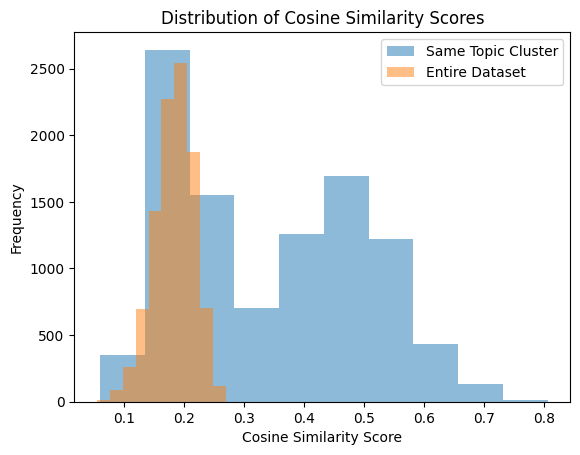

Mean cosine similarity (Same Topic Cluster): 0.34246457
Average time taken for Same Topic Cluster method: 0.0042395209
Mean cosine similarity (Entire Dataset): 0.18349026
Average time taken for Entire Dataset method: 0.013381105400000001


In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean cosine similarity for both methods

cosine_similarities_topic = scores_df['Same Topic']
cosine_similarities_all = scores_df['All articles']

mean_cosine_similarities_topic = np.mean(cosine_similarities_topic)
mean_cosine_similarities_all = np.mean(cosine_similarities_all)

# Plot distribution of cosine similarity scores
fig, ax = plt.subplots()
ax.hist(cosine_similarities_topic, alpha=0.5, label='Same Topic Cluster')
ax.hist(cosine_similarities_all, alpha=0.5, label='Entire Dataset')
ax.legend()
ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Cosine Similarity Scores')
plt.show()

# Print mean cosine similarity scores
print('Mean cosine similarity (Same Topic Cluster):', mean_cosine_similarities_topic)
print('Average time taken for Same Topic Cluster method:', scores_df['Time Taken for Same Topic method'].mean())
print('Mean cosine similarity (Entire Dataset):', mean_cosine_similarities_all)
print('Average time taken for Entire Dataset method:', scores_df['Time Taken for All articles method'].mean())